# Big 5 Exploratory Data Analysis

Data from: https://openpsychometrics.org/_rawdata/


Further potential sources:
    https://rdrr.io/cran/sirt/man/data.big5.html


### Introduction to the Big 5 Personality Model

The Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is a taxonomy, or grouping, for personality traits. When factor analysis (a statistical technique) is applied to personality survey data, some words used to describe aspects of personality are often applied to the same person. For example, someone described as conscientious is more likely to be described as "always prepared" rather than "messy". This theory is based therefore on the association between words but not on neuropsychological experiments. This theory uses descriptors of common language and therefore suggests five broad dimensions commonly used to describe the human personality and psyche.

The five factors are:

1. Openness to experience (inventive/curious vs. consistent/cautious)
2. Conscientiousness (efficient/organized vs. easy-going/careless)
3. Extraversion (outgoing/energetic vs. solitary/reserved)
4. Agreeableness (friendly/compassionate vs. challenging/detached)
5. Neuroticism (sensitive/nervous vs. secure/confident)

-Wikpedia

### Information About This Data Set

This data was collected (c. 2012) through on interactive online personality test. Participants were informed that their responses would be recorded and used for research at the begining of the test and asked to confirm their consent at the end of the test.

The following items were rated on a five point scale where 1=Disagree, 3=Neutral, 5=Agree (0=missed). All were presented on one page in the order E1, N2, A1, C1, O1, E2...... 

* E1	I am the life of the party.
* E2	I don't talk a lot.
* E3	I feel comfortable around people.
* E4	I keep in the background.
* E5	I start conversations.
* E6	I have little to say.
* E7	I talk to a lot of different people at parties.
* E8	I don't like to draw attention to myself.
* E9	I don't mind being the center of attention.
* E10	I am quiet around strangers.
* N1	I get stressed out easily.
* N2	I am relaxed most of the time.
* N3	I worry about things.
* N4	I seldom feel blue.
* N5	I am easily disturbed.
* N6	I get upset easily.
* N7	I change my mood a lot.
* N8	I have frequent mood swings.
* N9	I get irritated easily.
* N10	I often feel blue.
* A1	I feel little concern for others.
* A2	I am interested in people.
* A3	I insult people.
* A4	I sympathize with others' feelings.
* A5	I am not interested in other people's problems.
* A6	I have a soft heart.
* A7	I am not really interested in others.
* A8	I take time out for others.
* A9	I feel others' emotions.
* A10	I make people feel at ease.
* C1	I am always prepared.
* C2	I leave my belongings around.
* C3	I pay attention to details.
* C4	I make a mess of things.
* C5	I get chores done right away.
* C6	I often forget to put things back in their proper place.
* C7	I like order.
* C8	I shirk my duties.
* C9	I follow a schedule.
* C10	I am exacting in my work.
* O1	I have a rich vocabulary.
* O2	I have difficulty understanding abstract ideas.
* O3	I have a vivid imagination.
* O4	I am not interested in abstract ideas.
* O5	I have excellent ideas.
* O6	I do not have a good imagination.
* O7	I am quick to understand things.
* O8	I use difficult words.
* O9	I spend time reflecting on things.
* O10	I am full of ideas.

On the next page the following values were collected.

race	Chosen from a drop down menu. 1=Mixed Race, 2=Arctic (Siberian, Eskimo), 3=Caucasian (European), 4=Caucasian (Indian), 5=Caucasian (Middle East), 6=Caucasian (North African, Other), 7=Indigenous Australian, 8=Native American, 9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 10=Pacific (Polynesian, Micronesian, etc), 11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 12=West African, Bushmen, Ethiopian, 13=Other (0=missed)
age	entered as text (individuals reporting age < 13 were not recorded)
engnat	Response to "is English your native language?". 1=yes, 2=no (0=missed)
gender	Chosen from a drop down menu. 1=Male, 2=Female, 3=Other (0=missed)
hand	"What hand do you use to write with?". 1=Right, 2=Left, 3=Both (0=missed)

On this page users were also asked to confirm that their answers were accurate and could be used for research. Participants who did not were not recorded).

Some values were calculated from technical information.

country	The participant's technical location. ISO country code.
source	How the participant came to the test. Based on HTTP Referer. 1=from another page on the test website, 2=from google, 3=from facebook, 4=from any url with ".edu" in its domain name (e.g. xxx.edu, xxx.edu.au), 6=other source, or HTTP Referer not provided.

### Import Libraries

In [1]:
import re
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

### Read Data

In [2]:
data = pd.read_csv('data.csv', sep = '\t', lineterminator = '\r', low_memory=False)
data = data.fillna(0)
data.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,\n3,53.0,1.0,1.0,1.0,1.0,US,4.0,2.0,5.0,2.0,5.0,1.0,4.0,3.0,5.0,1.0,1.0,5.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,2.0,3.0,1.0,5.0,4.0,5.0,4.0,1.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,4.0,1.0,3.0,1.0,5.0,1.0,4.0,2.0,5.0,5.0
1,\n13,46.0,1.0,2.0,1.0,1.0,US,2.0,2.0,3.0,3.0,3.0,3.0,1.0,5.0,1.0,5.0,2.0,3.0,4.0,2.0,3.0,4.0,3.0,2.0,2.0,4.0,1.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,4.0,3.0,4.0,1.0,3.0,2.0,3.0,1.0,5.0,1.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,2.0
2,\n1,14.0,2.0,2.0,1.0,1.0,PK,5.0,1.0,1.0,4.0,5.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0
3,\n3,19.0,2.0,2.0,1.0,1.0,RO,2.0,5.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,4.0,5.0,2.0,5.0,4.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,1.0,4.0,5.0,4.0,2.0,3.0,4.0,3.0,5.0,2.0,4.0,2.0,5.0,2.0,5.0,5.0
4,\n11,25.0,2.0,2.0,1.0,2.0,US,3.0,1.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,5.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,3.0,1.0,5.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,5.0,3.0


# Cleaning

In [3]:
# add a unique ID to each person
data['ID'] = data.index

### Age

In [4]:
# Some people entered years like '1968' instead of age. I estimated age assuming they filled out the survey around 2012
f = lambda x: 2012-x if (x < 2005 and x > 1900) else x
data['age'] = data['age'].map(f)

# Some people entered values like 9999999 as their age. I dropped these values.
indices = data[data['age']>100].index
data.drop(indices, inplace = True)

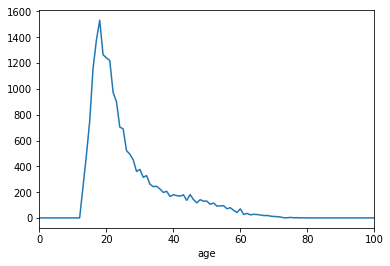

In [5]:
df_age = data.groupby('age')['ID'].nunique()
df_age.plot()

### Race

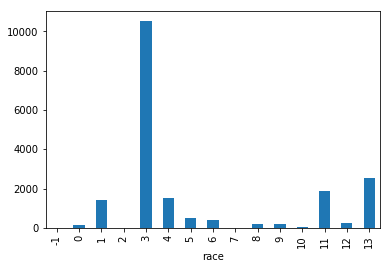

In [6]:
numbers = re.compile('\d+(?:\.\d+)?')

f = lambda x: int((numbers.findall(str(x))+['-1'])[0])
data['race'] = data['race'].map(f)

df_race = data.groupby('race')['ID'].nunique()
df_race.plot.bar()

In [7]:
#drop everyone who didn't answer
data = data.drop(data[data['race']==0].index)
f = lambda x: 'Caucasian' if x == 3 else (
    'Mixed Race' if x == 1 else (
    'Indian' if x == 4 else (
    'East Asian' if x == 11 or x == 9 else(
    'Other'))))
data['race'] = data['race'].map(f)

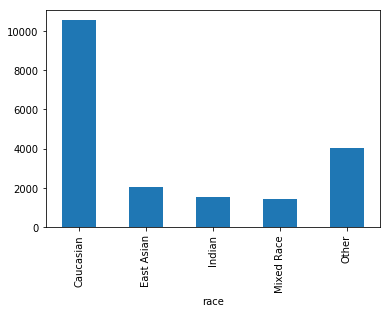

In [8]:
df_race = data.groupby('race')['ID'].nunique()
df_race.plot.bar()

In [9]:
race = pd.get_dummies(data['race']).drop('Other',axis=1)
data = data.drop('race', axis = 1)
data = data.join(race)

### Is English Your Native Language?

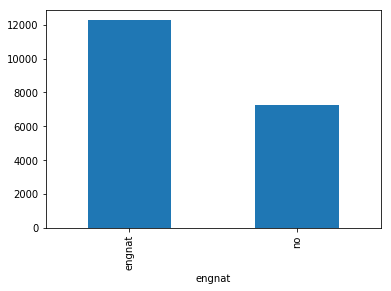

In [10]:
# drop those who didn't answer
data = data.drop(data[data['engnat'] == 0.0].index)
f = lambda x: 'engnat' if x == 1 else 'no'
data['engnat'] = data['engnat'].map(f)
df_engnat = data.groupby('engnat')['ID'].nunique()
df_engnat.plot.bar()

In [11]:
engnat = pd.get_dummies(data['engnat']).drop('no',axis=1)
data = data.drop('engnat',axis=1)
data = data.join(engnat)

### Country (only top 20 plotted)

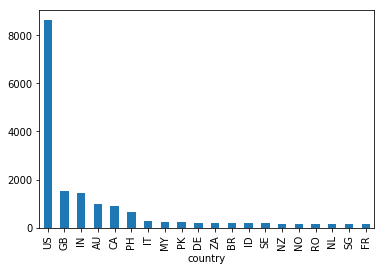

In [12]:
data = data.drop(data[data['country']=='(nu'].index)

df_country = data.groupby('country')['ID'].nunique().sort_values(ascending=False)
df_country.head(20).plot.bar()

In [13]:
# Get lists of country codes corresponding to each continent
AF = ['DZ','AO','BW','BI','CM','CV','CF','TD','KM','YT','CG','CD','BJ','GQ','ET','ER','DJ','GA','GM','GH','GN','CI','KE','LS','LR','LY','MG','MW','ML','MR','MU','MA','MZ','NA','NE','NG','GW','RE','RW','SH','ST','SN','SC','SL','SO','ZA','ZW','SS','EH','SD','SZ','TG','TN','UG','EG','TZ','BF','ZM']
AS = ['AF','AZ','BH','BD','AM','BT','IO','BN','MM','KH','LK','CN','TW','CX','CC','CY','GE','PS','HK','IN','ID','IR','IQ','IL','JP','KZ','JO','KP','KR','KW','KG','LA','LB','MO','MY','MV','MN','OM','NP','PK','PH','TL','QA','SA','SG','VN','SY','TJ','TH','AE','TR','TM','UZ','YE','XE','XD','XS']
EU = ['AL','AD','AZ','AT','AM','BE','BA','BG','BY','HR','CY','CZ','DK','EE','FO','FI','AX','FR','GE','DE','GI','GR','VA','HU','IS','IE','IT','KZ','LV','LI','LT','LU','MT','MC','MD','ME','NL','NO','PL','PT','RO','RU','SM','RS','SK','SI','ES','SJ','SE','CH','TR','UA','MK','GB','GG','JE','IM']
NA = ['AG','BS','BB','BM','BZ','VG','CA','KY','CR','CU','DM','DO','SV','GL','GD','GP','GT','HT','HN','JM','MQ','MX','MS','AN','CW','AW','SX','BQ','NI','UM','PA','PR','BL','KN','AI','LC','MF','PM','VC','TT','TC','US','VI']
OC = ['AS','AU','SB','CK','FJ','PF','KI','GU','NR','NC','VU','NZ','NU','NF','MP','UM','FM','MH','PW','PG','PN','TK','TO','TV','WF','WS','XX']
SA = ['AR','BO','BR','CL','CO','EC','FK','GF','GY','PY','PE','SR','UY','VE']

In [14]:
f = lambda x: 'AF' if x in AF else(
    'AS' if x in AS else(
    'EU' if x in EU else(
    'NA' if x in NA else(
    'OC' if x in OC else 'SA'))))
data['country'] = data['country'].map(f)

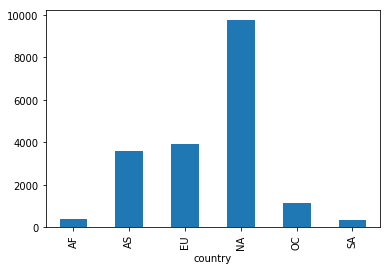

In [15]:
df_country = data.groupby('country')['ID'].nunique()
df_country.plot.bar()

In [16]:
continents = pd.get_dummies(data['country']).drop('SA',axis=1)
data = data.drop('country',axis=1)
data = data.join(continents)

### Gender

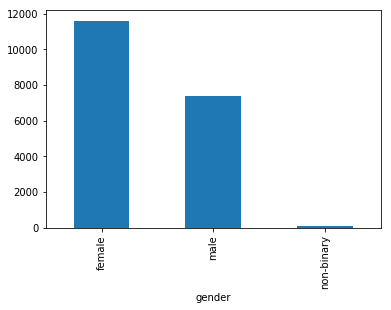

In [17]:
f = lambda x: 'male' if x == 1 else ('female' if x == 2 else ('non-binary'))
data['gender'] = data['gender'].map(f)

df_gender = data.groupby('gender')['ID'].nunique()
df_gender.plot.bar()

In [18]:
data = data.drop(data[data['gender'] == 0].index)
gender = pd.get_dummies(data['gender']).drop('female',axis=1)

data = data.drop('gender',axis=1)
data = data.join(gender)

### Hand

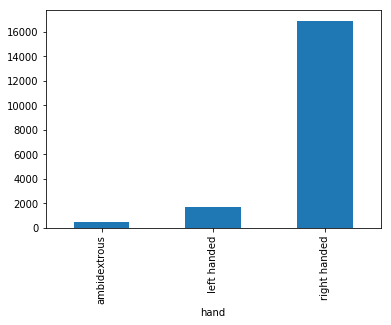

In [19]:
data = data.drop(data[data['hand']==0].index)

f = lambda x: 'right handed' if x == 1 else ('left handed' if x ==2 else 'ambidextrous')
data['hand'] = data['hand'].map(f)

df_hand = data.groupby('hand')['ID'].nunique()
df_hand.plot.bar()

In [20]:
hand = pd.get_dummies(data['hand']).drop('left handed',axis=1)
data = data.drop('hand',axis=1)
data = data.join(hand)

### Source

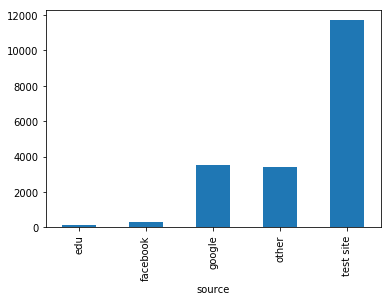

In [21]:
f = lambda x: 'test site' if x == 1 else(
    'google' if x == 2 else(
    'facebook' if x == 3 else(
    'edu' if x == 4 else('other'))))
data['source'] = data['source'].map(f)

df_source = data.groupby('source')['ID'].nunique()
df_source.plot.bar()

In [22]:
source = pd.get_dummies(data['source']).drop('other', axis=1)
data = data.drop('source', axis=1)
data = data.join(source)

In [23]:
data = data.drop('ID', axis = 1) # ID was used for plotting, no use anymore, and will interfere with ML models

### Remove Missed Answers

In [24]:
# make a DataFrame with just the answers to the BIG 5 Survey
answers = data.loc[:,'E1':'O10'].copy()
answers = answers.fillna(0)

# Check how many answers each person missed
(answers==0).astype(int).sum(axis=1).sort_values(ascending=False).head()

19064    50
19718     0
6821      0
6815      0
6816      0
dtype: int64

In [25]:
# drop the individual who missed all questions. They also happened to be the only individual to miss any questions.
data = data.drop(19064)
answers = answers.drop(19064)

### Reverse Some Answers

In [26]:
# Some questions actually measure the inverse of the personality trait that they are supposed to measure
# For example 'I have little to say' measures introversion rather than extraversion
# To account for this, I need to flip the responses to these questions, ampping 1 to 5 and vice versa

flip_dict = {
    'E1' : 1,  #I am the life of the party.
    'E2' : -1, #I don't talk a lot.
    'E3' : 1,  #I feel comfortable around people.
    'E4' : -1, #I keep in the background.
    'E5' : 1,  #I start conversations.
    'E6' : -1, #I have little to say.
    'E7' : 1,  #I talk to a lot of different people at parties.
    'E8' : -1, #I don't like to draw attention to myself.
    'E9' : 1,  #I don't mind being the center of attention.
    'E10': -1, #I am quiet around strangers.
    'N1' : 1,  #I get stressed out easily.
    'N2' : -1, #I am relaxed most of the time.
    'N3' : 1,  #I worry about things.
    'N4' : -1, #I seldom feel blue.
    'N5' : 1,  #I am easily disturbed.
    'N6' : 1,  #I get upset easily.
    'N7' : 1,  #I change my mood a lot.
    'N8' : 1,  #I have frequent mood swings.
    'N9' : 1,  #I get irritated easily.
    'N10': 1,  #I often feel blue.
    'A1' : -1, #I feel little concern for others.
    'A2' : 1,  #I am interested in people.
    'A3' : -1, #I insult people.
    'A4' : 1,  #I sympathize with others' feelings.
    'A5' : -1, #I am not interested in other people's problems.
    'A6' : 1,  #I have a soft heart.
    'A7' : -1, #I am not really interested in others.
    'A8' : 1,  #I take time out for others.
    'A9' : 1,  #I feel others' emotions.
    'A10': 1,  #I make people feel at ease.
    'C1' : 1,  #I am always prepared.
    'C2' : -1, #I leave my belongings around.
    'C3' : 1,  #I pay attention to details.
    'C4' : -1, #I make a mess of things.
    'C5' : 1,  #I get chores done right away.
    'C6' : -1, #I often forget to put things back in their proper place.
    'C7' : 1,  #I like order.
    'C8' : -1, #I shirk my duties.
    'C9' : 1,  #I follow a schedule.
    'C10': 1,  #I am exacting in my work.
    'O1' : 1,  #I have a rich vocabulary.
    'O2' : -1, #I have difficulty understanding abstract ideas.
    'O3' : 1,  #I have a vivid imagination.
    'O4' : -1, #I am not interested in abstract ideas.
    'O5' : 1,  #I have excellent ideas.
    'O6' : -1, #I do not have a good imagination.
    'O7' : 1,  #I am quick to understand things.
    'O8' : 1,  #I use difficult words.
    'O9' : 1,  #I spend time reflecting on things.
    'O10': 1   #I am full of ideas.
}

In [27]:
for i in answers.columns:
    data[i] = data[i]*flip_dict[i] + 3*(1-flip_dict[i])   
    answers[i] = data[i]

### Group Answers by Trait and Average

In [28]:
openness = data.loc[:,'O1':'O10']
conscientiousness = data.loc[:,'C1':'C10']
extraversion = data.loc[:,'E1':'E10']
agreeableness = data.loc[:,'A1':'A10']
neuroticism = data.loc[:,'N1':'N10']

data['open'] = openness.mean(axis=1)
data['conc'] = conscientiousness.mean(axis=1)
data['extra'] = extraversion.mean(axis=1)
data['agree'] = agreeableness.mean(axis=1)
data['neuro'] = neuroticism.mean(axis=1)

In [29]:
grouped = data.drop(data.loc[:,'E1':'O10'],axis=1)
grouped.head() #cleaned up version of data, where all answers within each category have been grouped and averaged

,age,Caucasian,East Asian,Indian,Mixed Race,engnat,AF,AS,EU,NA,OC,male,non-binary,ambidextrous,right handed,edu,facebook,google,test site,open,conc,extra,agree,neuro
0,53.0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,4.3,4.7,4.4,4.6,1.1
1,46.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,2.6,4.2,2.2,3.5,3.1
2,14.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4.5,4.9,3.5,3.8,4.6
3,19.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,4.1,2.6,2.2,3.7,4.3
4,25.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,3.4,3.4,3.4,4.4,3.0


### Normalize

In [30]:
for col in ['age','open','conc','extra','agree','neuro']:
    col_copy = grouped[col].copy()

    min_stat = col_copy.min()
    max_stat = col_copy.max()

    f = lambda x: (x-min_stat)/(max_stat-min_stat)
    col_copy = col_copy.map(f)

    grouped = grouped.drop(col, axis=1)
    grouped = grouped.join(col_copy)

In [31]:
grouped.head()

,Caucasian,East Asian,Indian,Mixed Race,engnat,AF,AS,EU,NA,OC,male,non-binary,ambidextrous,right handed,edu,facebook,google,test site,age,open,conc,extra,agree,neuro
0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0.465909,0.825,0.925,0.850,0.900,0.025
1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0.386364,0.400,0.800,0.300,0.625,0.525
2,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0.022727,0.875,0.975,0.625,0.700,0.900
3,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0.079545,0.775,0.400,0.300,0.675,0.825
4,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0.147727,0.600,0.600,0.600,0.850,0.500


### Visualizations

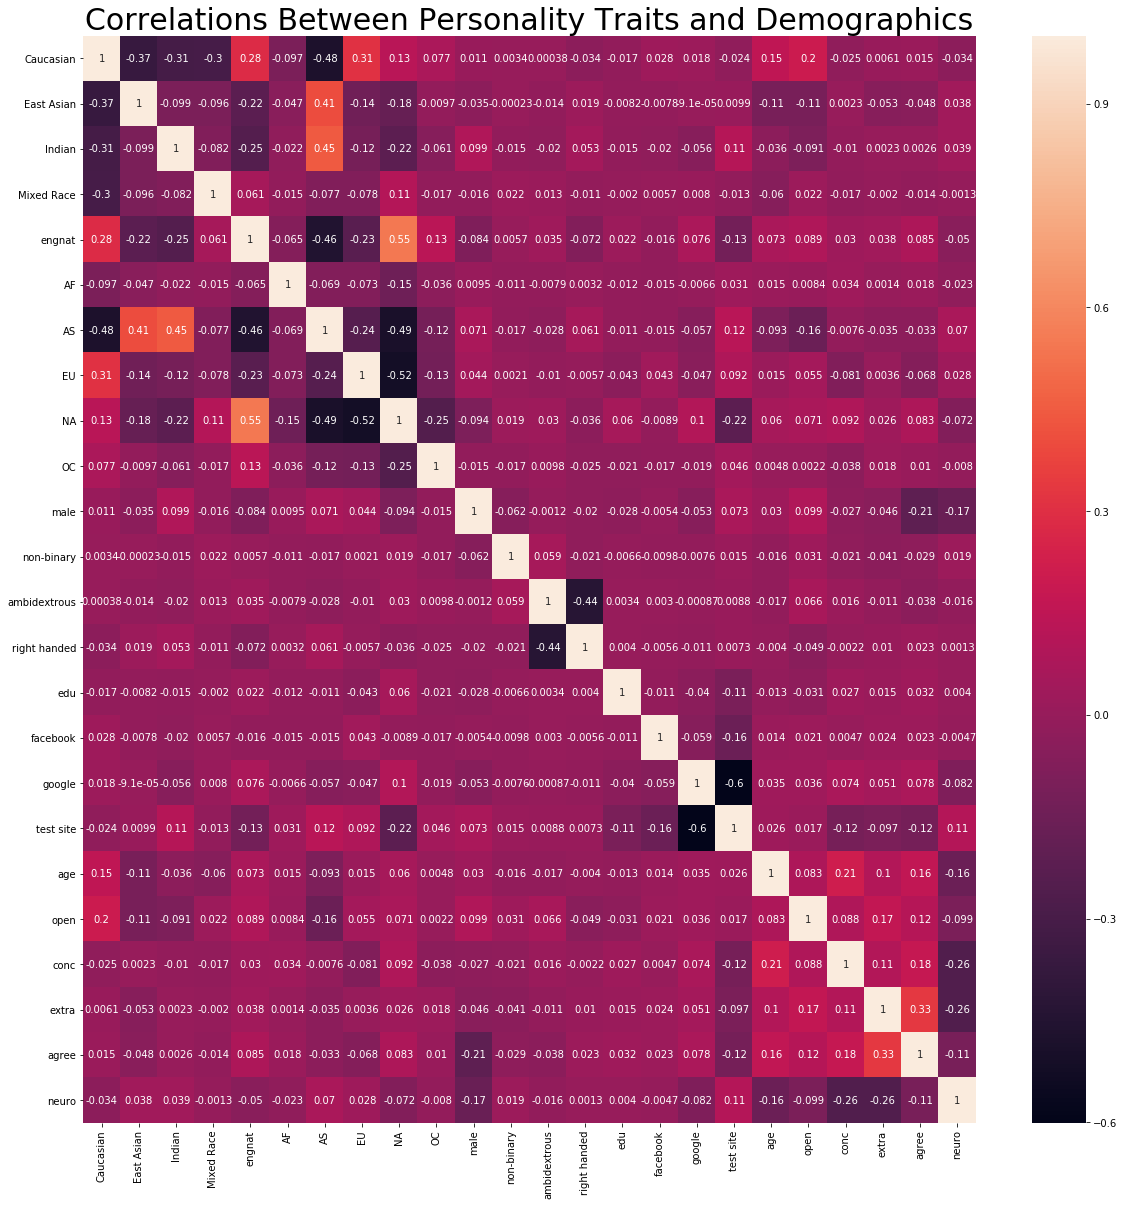

In [37]:
plt.figure(figsize=(20,20))
plt.title('Correlations Between Personality Traits and Demographics', fontsize = 30)
sns.heatmap(grouped.corr(), annot = True)

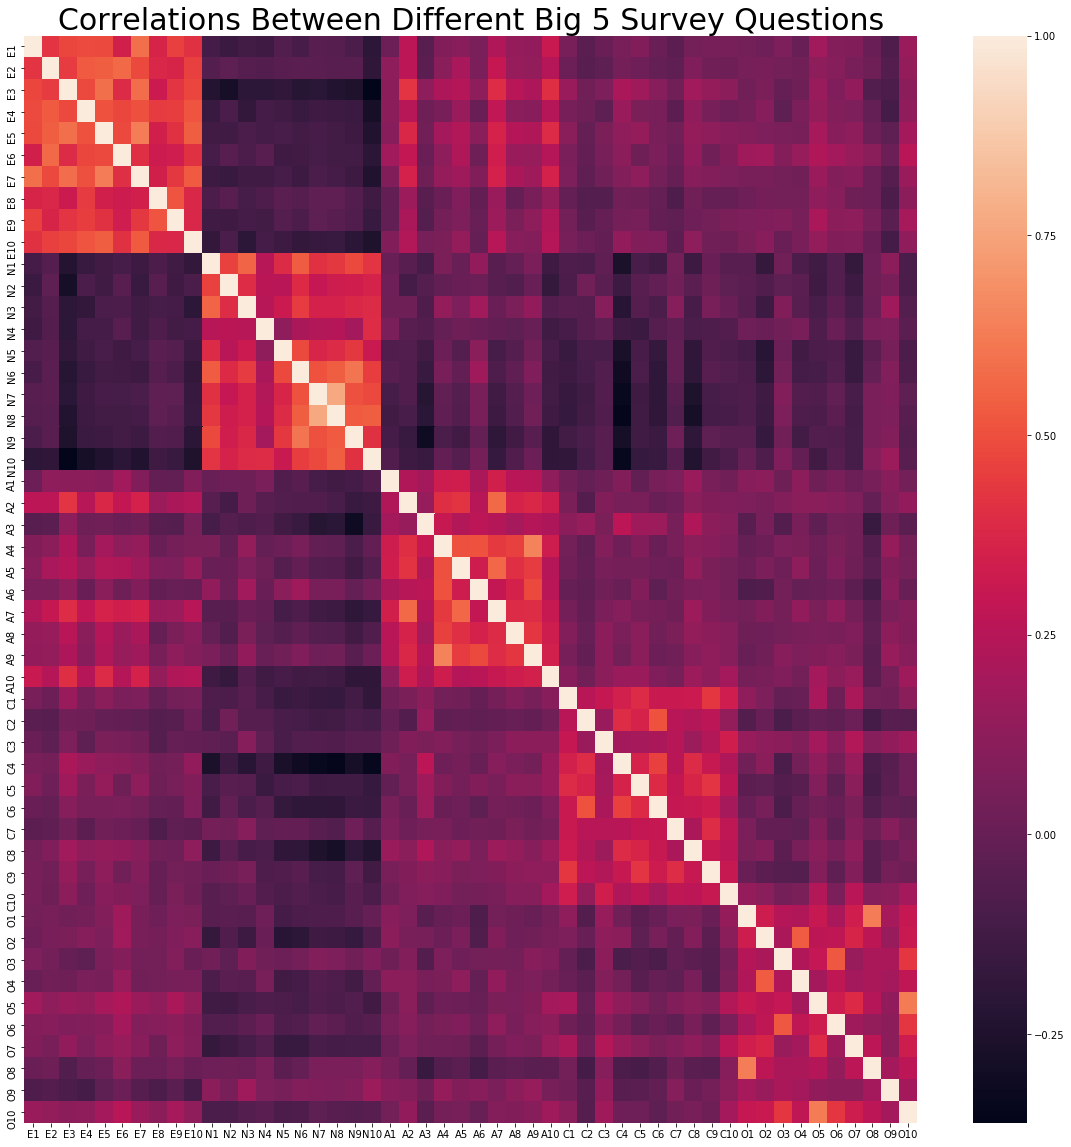

In [38]:
plt.figure(figsize=(20,20))
plt.title('Correlations Between Different Big 5 Survey Questions', fontsize = 30)
sns.heatmap(answers.corr(), annot = False)

### Save data as csv files

In [34]:
grouped.to_csv('grouped.csv', index=False)
answers.to_csv('answers.csv', index=False)